# Creation and Training of our Model

## Importing Libraries

In [31]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import numpy as np

## Importing the Dataset and Preparing the Data

### Fetch The Data

In [11]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


### Degrade the RGB values between 0 and 1.

In [12]:

train_images = train_images / 255
test_images = test_images / 255



### Lets take a look at some examples

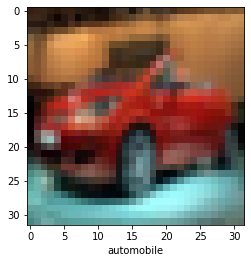

In [13]:
def showImage():
    index = int(input('Enter the index:'))
    if(index > 0 ):
        plt.imshow(train_images[index], cmap= plt.cm.binary)
        plt.xlabel(class_names[train_labels[index][0]])
        plt.show()
    else:
        print("Enter a valid value!")
showImage()

## Create the Model and Train

### Creating the Convolutional Base

I used 3 convolutional and 2 Pooling Layers to extract features and decrease the parameter size to 4x4x64.

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape= (32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3),activation='relu'))

Let's take a look at the model structure.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

### Create the Dense Layer

Model will have one hidden layer and 10 output layers.

In [16]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation= 'relu'))
model.add(layers.Dense(10))

### Take a look at the final structure of our model.

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

### Compile the Model and Train

In [18]:
model.compile(optimizer= 'adam',loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True), metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs = 10, validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 42s 26ms/step - loss: 1.5205 - accuracy: 0.4488 - val_loss: 1.2994 - val_accuracy: 0.5364
Epoch 2/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.1520 - accuracy: 0.5918 - val_loss: 1.0973 - val_accuracy: 0.6128
Epoch 3/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9990 - accuracy: 0.6476 - val_loss: 0.9800 - val_accuracy: 0.6510
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8976 - accuracy: 0.6840 - val_loss: 0.9615 - val_accuracy: 0.6624
Epoch 5/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.8206 - accuracy: 0.7117 - val_loss: 0.8772 - val_accuracy: 0.6931
Epoch 6/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7621 - accuracy: 0.7323 - val_loss: 0.8674 - val_accuracy: 0.7020
Epoch 7/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7170 - accuracy: 0.7496 - val_loss: 0.8405 -

### Try to evaluate the test Data.

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

313/313 - 2s - loss: 0.8787 - accuracy: 0.7071 - 2s/epoch - 8ms/step


## Save Our Model

In [25]:
name = input('Enter the mode name')
model.save('./models/'+name)

INFO:tensorflow:Assets written to: ./models/main\assets


## Loading The Model (Alternative)

In [37]:
x = input('Model Name:')
if x == '':
    x = 'main'
model = tf.keras.models.load_model('./models/'+name)

## Predict Values

In [36]:
predictions = model.predict(test_images)

### Print Predicted Values

truck


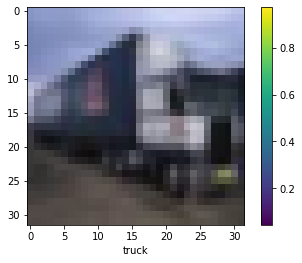

In [32]:
x = int(input('Index:'))
plt.figure()
plt.imshow(test_images[x])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[np.argmax(predictions[x])])
print(class_names[test_labels.tolist()[x][0]])
plt.show()